<a href="https://colab.research.google.com/github/sportole/heart-failure-prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Kaggle Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 15.1MB/s]


In [6]:
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


**Attribute Information**

---



1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


---



# Importing the Dependencies

In [7]:
#data analysis
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#data moduling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
heart_df = pd.read_csv('/content/heart.csv')

# Data Exploration

In [9]:
#print first five rows
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
#print last five rows
heart_df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [11]:
heart_df.isna().sum() #heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In case of null data, imputation is done.

In [12]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
heart_df.shape

(918, 12)

In [14]:
#data statistics
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
#checking the distribution of target variable (Heart Disease)
heart_df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


High difference in value counts of Heart Disease might result in Overfitting or Underfitting.

1 --> Heart Failure

0 --> Normal Heart

# Data Visualization

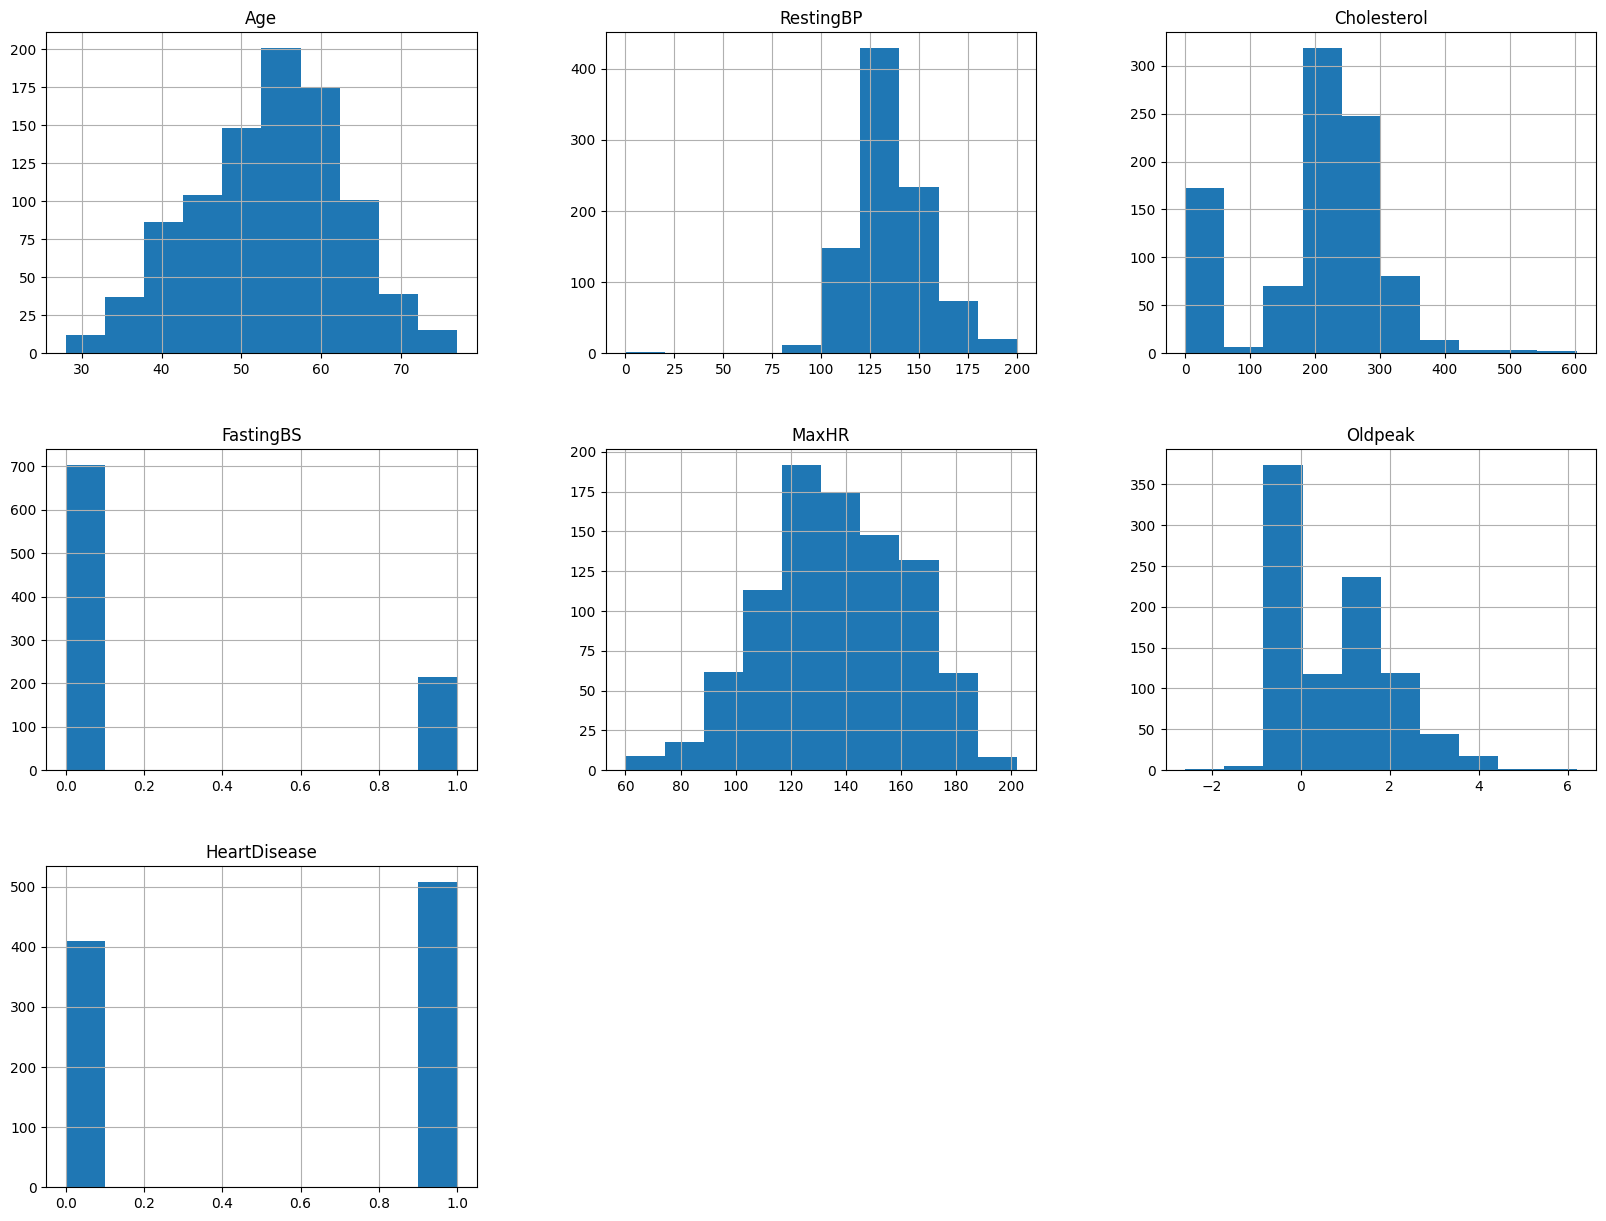

In [16]:
heart_df.hist(figsize=(20,15)) #20x15 inches
plt.show()

<Axes: >

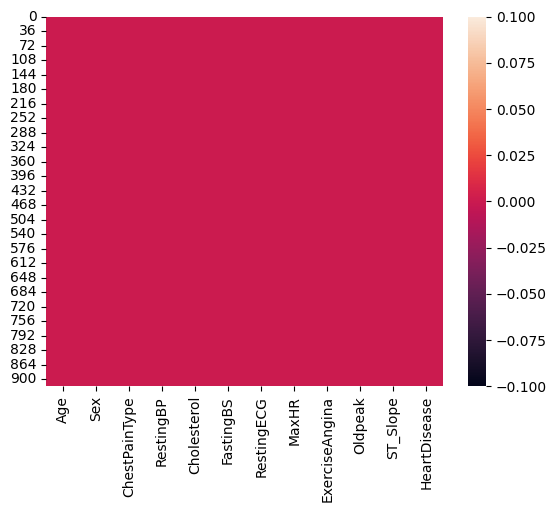

In [17]:
sns.heatmap(heart_df.isna())

As there are no missing values, the heatmap has solid color.

**Note:**

*   True (missing) is mapped to a darker color.
*   False (non-missing) to a lighter color.
*   Mixed cells show how null values are distributed across rows or columns.



In [18]:
Sex_pie = heart_df['Sex'].value_counts()

In [19]:
Sex_pie

,count
Sex,
M,725
F,193


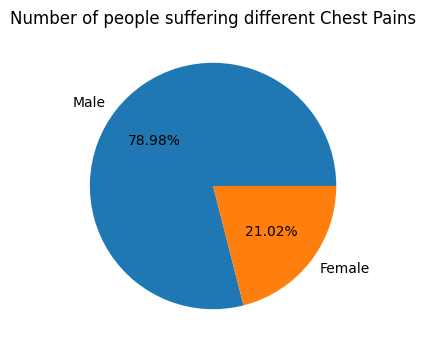

In [20]:
plt.figure(figsize=(4,4))
plt.pie(
    x=Sex_pie,labels=['Male','Female'],autopct='%.2f%%'
)
plt.title('Number of people suffering different Chest Pains')
plt.show()

In [21]:
ChestPainType_bar = heart_df['ChestPainType'].value_counts()

In [22]:
ChestPainType_bar

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


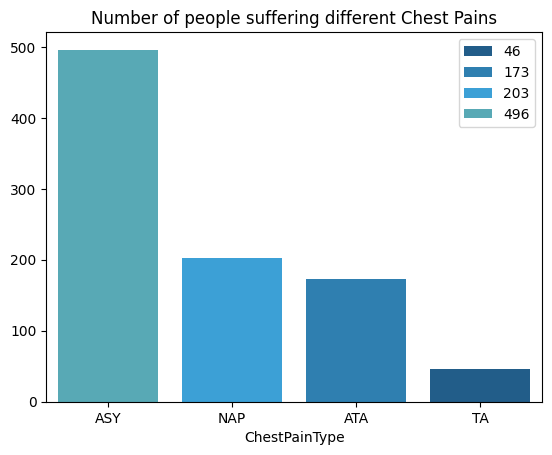

In [23]:
colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4"]
ChestPainType_barplot = sns.barplot(x=ChestPainType_bar.index,y=ChestPainType_bar.values,hue=ChestPainType_bar.values,palette=colors) #ChestPainType_bar.plot(kind='bar')
plt.title('Number of people suffering different Chest Pains')
plt.show()

In [24]:
RestingECG_bar = heart_df['RestingECG'].value_counts()

In [25]:
RestingECG_bar

,count
RestingECG,
Normal,552
LVH,188
ST,178


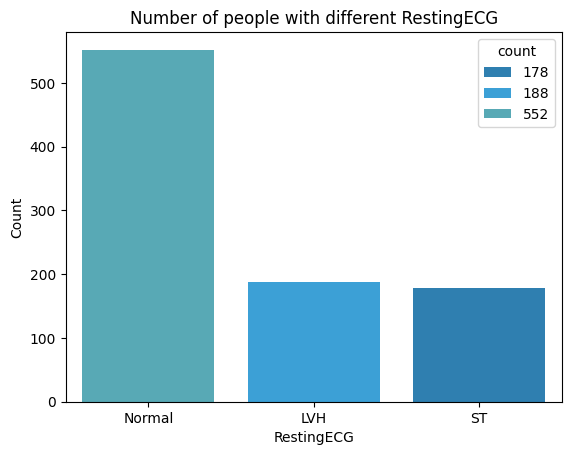

In [26]:
colors = ["#1984c5", "#22a7f0", "#48b5c4"]
RestingECG_barplot = sns.barplot(x=RestingECG_bar.index,y=RestingECG_bar.values,hue=RestingECG_bar,palette=colors) #RestingECG_bar.plot(kind='bar')RestingECG_bar.plot(kind='bar')
plt.title('Number of people with different RestingECG')
plt.ylabel('Count')
plt.show()

In [27]:
ExerciseAngina_bar = heart_df['ExerciseAngina'].value_counts()

In [28]:
ExerciseAngina_bar

,count
ExerciseAngina,
N,547
Y,371


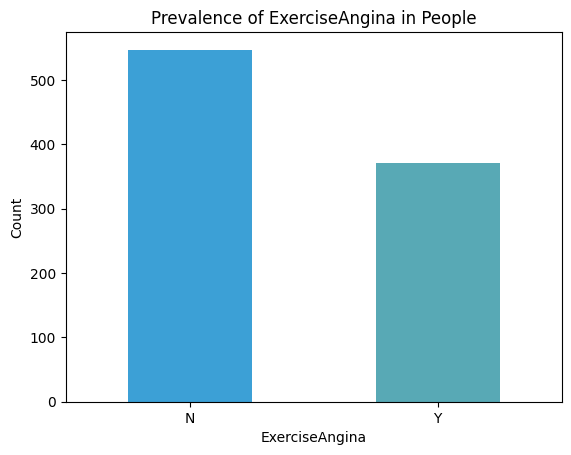

In [29]:
colors = ["#22a7f0", "#48b5c4"]
ExerciseAngina_barlot = sns.barplot(x=ExerciseAngina_bar.index,y=ExerciseAngina_bar.values,hue=ExerciseAngina_bar.index,palette=colors,width=0.5) #ExerciseAngina_bar.plot(kind='bar')
plt.title('Prevalence of ExerciseAngina in People')
plt.ylabel('Count')
plt.show()

In [30]:
ST_Slope_bar = heart_df['ST_Slope'].value_counts()

In [31]:
ST_Slope_bar

,count
ST_Slope,
Flat,460
Up,395
Down,63


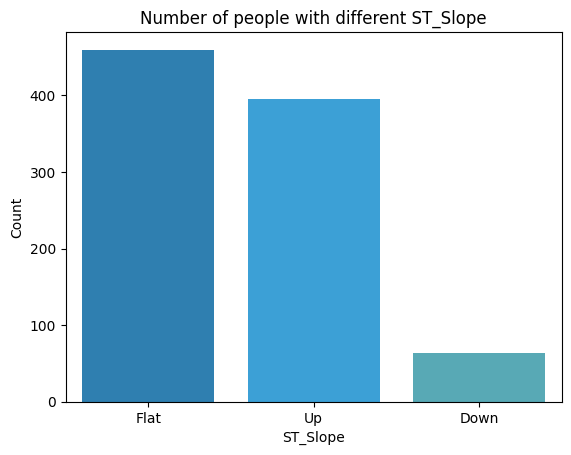

In [32]:
colors = ["#1984c5", "#22a7f0", "#48b5c4"]
ST_Slope_barplot = sns.barplot(x=ST_Slope_bar.index,y=ST_Slope_bar.values,hue=ST_Slope_bar.index,palette=colors)
plt.title('Number of people with different ST_Slope')
plt.ylabel('Count')
plt.show()

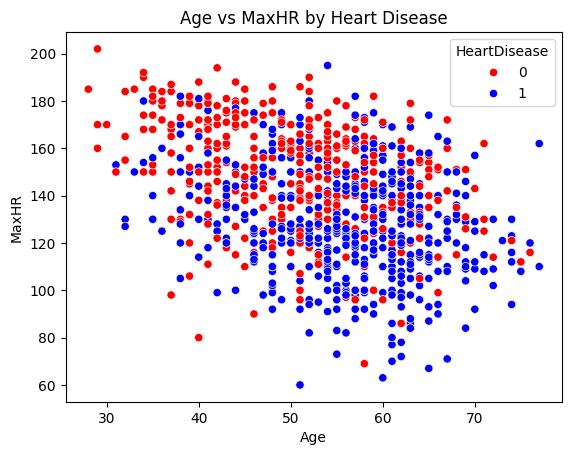

In [33]:
sns.scatterplot(data=heart_df, x='Age', y='MaxHR',hue='HeartDisease', palette=['red','blue'])
plt.title('Age vs MaxHR by Heart Disease')
plt.show()

# Splitting the Data

In [35]:
X = heart_df.drop(columns='HeartDisease', axis=1)
Y = heart_df['HeartDisease']

In [39]:
print(X)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
0      172              N      0.0       

In [40]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [38]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(734, 11) (184, 11) (734,) (184,)


# Modeling